# Confusion matrix plotted by [Scikit-Learn](https://scikit-learn.org/0.23/)

Intuition to replicate the same behavior in SeaBorn with multilabels confusion matrices.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## Data

Here we use the classic Iris dataset pre-loaded by the Sklearn library.

In [2]:
iris = load_iris()
data, target = iris.data, iris.target

## Transform the data in a `pandas` DataFrame

Make the date in pandas DataFrame we get some cool methods to see some features of the dataset.

In [3]:
df = pd.DataFrame(data=data, columns = iris.feature_names)

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=2022)

## Model selection

Using the simple `train_test_split` to make a train set and a test set.

## Classifier Estimator

Since the goal is not to find the classificator i will use a DecisionTree estimator to make the predictions to plot the preds.

In [6]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=2022)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2022, splitter='best')

## Confusion Matrix

Here is the goal of this notebook, it's needed a trained model, the true preds, and the test set.

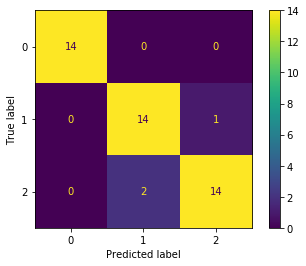

In [7]:
plot_confusion_matrix(dt, X_test, y_test)

### Bonus

We make a `accuracy_score` to see how well the estimator was.

In [8]:
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.9333333333333333